# [Plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html)

In the relational plot tutorial we saw how to use different visual representations to show the relationship between multiple variables in a dataset. In the examples, we focused on cases where the main relationship was between two numerical variables. If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between relplot() and either scatterplot() or lineplot(), there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

**Categorical scatterplots:**

- [stripplot()](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot) (with kind="strip"; the default)
- [swarmplot()](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot) (with kind="swarm")

**Categorical distribution plots:**

- [boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) (with kind="box")
- [violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) (with kind="violin")
- [boxenplot()](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot) (with kind="boxen")

**Categorical estimate plots:**

- [pointplot()](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) (with kind="point")
- [barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) (with kind="bar")
- [countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) (with kind="count")

These families represent the data using different levels of granularity. When deciding which to use, you’ll have to think about the question that you want to answer. The unified API makes it easy to switch between different kinds and see your data from several perspectives.

In this tutorial, we’ll mostly focus on the figure-level interface, catplot(). Remember that this function is a higher-level interface each of the functions above, so we’ll reference them when we show each kind of plot, keeping the more verbose kind-specific API documentation at hand.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## Categorical scatterplots

The default representation of the data in catplot() uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:

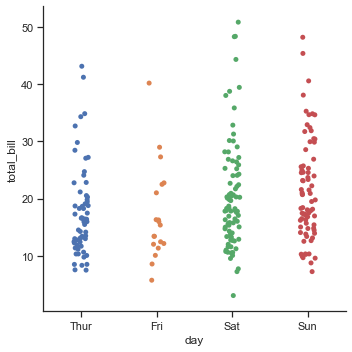

In [9]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", kind="strip", data=tips);

The jitter parameter controls the magnitude of jitter or disables it altogether:

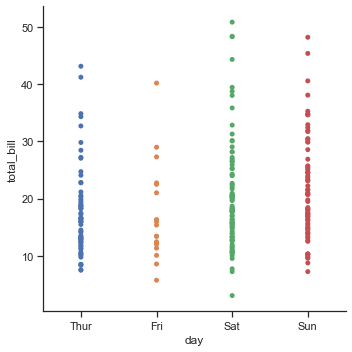

In [3]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by swarmplot(), which is activated by setting kind="swarm" in catplot():

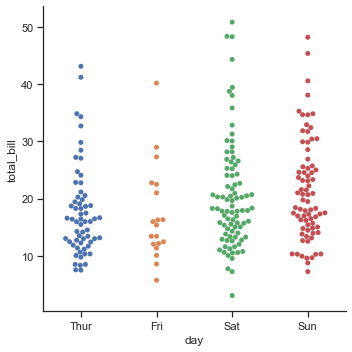

In [4]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic. (The categorical plots do not currently support size or style semantics). Each different categorical plotting function handles the hue semantic differently. For the scatter plots, it is only necessary to change the color of the points:

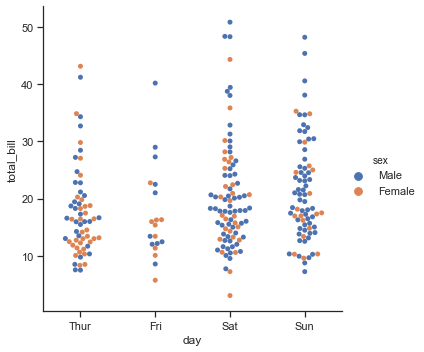

In [5]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

Unlike with numerical data, it is not always obvious how to order the levels of the categorical variable along its axis. In general, the seaborn categorical plotting functions try to infer the order of categories from the data. If your data have a pandas Categorical datatype, then the default order of the categories can be set there. If the variable passed to the categorical axis looks numerical, the levels will be sorted. But the data are still treated as categorical and drawn at ordinal positions on the categorical axes (specifically, at 0, 1, …) even when numbers are used to label them:

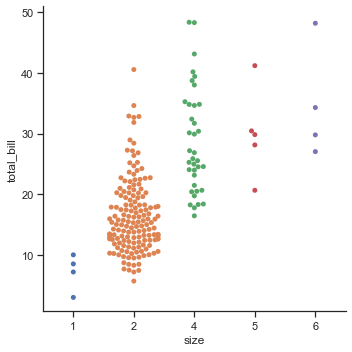

In [6]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

The other option for choosing a default ordering is to take the levels of the category as they appear in the dataset. The ordering can also be controlled on a plot-specific basis using the order parameter. This can be important when drawing multiple categorical plots in the same figure, which we’ll see more of below:

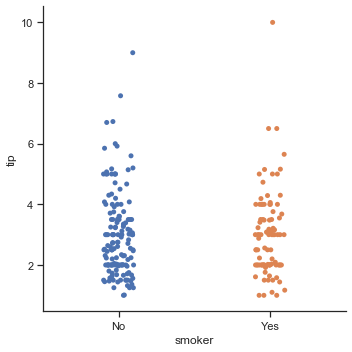

In [7]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

We’ve referred to the idea of “categorical axis”. In these examples, that’s always corresponded to the horizontal axis. But it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories). To do this, swap the assignment of variables to axes:

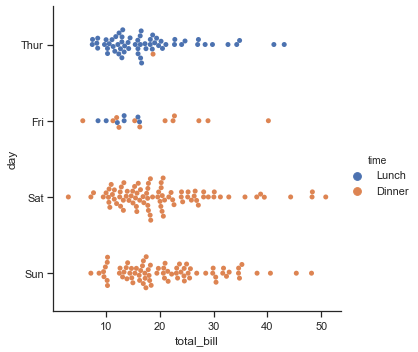

In [8]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);